In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import  scsingscore.scsingscore  as si
from scipy import sparse
import seaborn as sns

In [2]:
n_genes = 1000
n_cells = 10000

X = sparse.random(n_cells, n_genes, density=0.1, dtype=np.float32, format='csr') * 10

varnames = [f'g{i}' for i in range(n_genes)]
obsnames = [f'cell{i}' for i in range(n_cells)]

adata = sc.AnnData(X,
                   var=pd.DataFrame(index=varnames),
                   obs=pd.DataFrame(index=obsnames)
                  )
sc.pp.pca(adata)
print('doing nn')
sc.pp.neighbors(adata)

doing nn


In [3]:
gene_set=[f'g{_}' for _ in range(100)]

In [4]:
si.sc_score_one(adata, 0, noise_trials=10, num_neighbors=10, samp_neighbors=5, gene_set=gene_set, compute_neighbors=False)

-0.05552342394447658

In [5]:
si.sc_score_one(adata, 0, noise_trials=0, num_neighbors=14, samp_neighbors=14, gene_set=gene_set, compute_neighbors=False)

-0.026500553287289674

In [6]:
from scsingscore.scsingscore_ms import *
from scsingscore.scsingscore_ms import _score_one_by_one, _ms_sing, _score_all_at_once

In [7]:
smoothed_matrix = nn_smoothing(adata.X, adata, 'connectivity', samp_neighbors=14)
# for easier handling with gene names
smoothed_adata = sc.AnnData(smoothed_matrix, obs=adata.obs, var=adata.var)

In [9]:
%load_ext snakeviz

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [ ]:
%%snakeviz
scores_across_cells = _score_one_by_one(gene_set, smoothed_adata, noise_trials=0, mode='average', )
# scores_across_cells

 54%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 5391/10000 [00:12<00:10, 436.34it/s]

In [34]:
a = pd.DataFrame(s2)['total_score']
b = a.to_dict()

In [35]:
%timeit a[111]

1.14 µs ± 6.51 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [37]:
%timeit a.loc[111]

4.61 µs ± 11.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [36]:
%timeit b[111]

18.9 ns ± 0.157 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [10]:
%%snakeviz
s2 = _score_all_at_once(gene_set, smoothed_adata, noise_trials=0, mode='average', )

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:15<00:00, 635.72it/s]


 
*** Profile stats marshalled to file '/tmp/tmpecg4t360'. 
Embedding SnakeViz in this document...


In [12]:
s2 = pd.DataFrame(s2)

In [14]:
x = s2['total_score']

In [19]:
ix = np.random.choice(len(x), 100)

In [22]:
%timeit x[ix]

129 µs ± 6.47 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
%timeit [x[j] for j in ix]

130 µs ± 439 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
%%snakeviz
s2 = _score_all_at_once(gene_set, smoothed_adata, noise_trials=0, mode='average', )


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:57<00:00, 173.86it/s]


 
*** Profile stats marshalled to file '/tmp/tmpuaeekmtr'. 
Embedding SnakeViz in this document...


In [16]:
%matplotlib inline

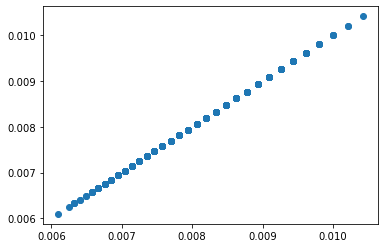

In [17]:
import matplotlib.pyplot as plt
plt.scatter(scores_across_cells, pd.DataFrame(s2)['total_score'])

In [14]:
q = sc_score(adata,  noise_trials=0, samp_neighbors=0, gene_set=gene_set)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:18<00:00, 543.99it/s]


In [17]:
%matplotlib inline

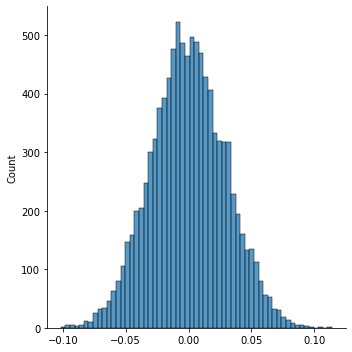

In [18]:
sns.displot(q)

In [78]:
full_matrix = nn_smoothing(adata.X, adata, 'connectivity', samp_neighbors=0)

In [80]:
S = get_smoothing_matrix(adata, mode='connectivity')
# sns.displot(S.A.flatten())

In [91]:
cell_ix = 5

In [121]:
gene_mat = full_matrix[cell_ix]
# then we subset it to only the genes with counts
_, gdx, _ = sparse.find(gene_mat)
df = pd.DataFrame(gene_mat[:, gdx].A.flatten(), index=adata.var.index[gdx])
df.columns = ['gene_counts']


In [124]:
s = si.score(up_gene=gene_set, sample=df, norm_method='standard', full_data=False) # standard workin gbetter here than theoretical

In [125]:
s

,total_score
gene_counts,NaN


In [118]:
sample.shape

(756, 1)

In [104]:
sample =df 
up_gene = gene_set
sig_len_up = len(up_gene)


In [105]:
up_sort = sample['gene_counts'].rank(method='min', ascending=True)

In [106]:
            for j in up_gene:
                if j in up_sort.index:
                    su.append(up_sort[j])
                else:
                    sig_len_up = sig_len_up -1
